parâmetros:  [ 3.32368421 -3.45526316]
reta: y = 3.32368 * x + -3.45526


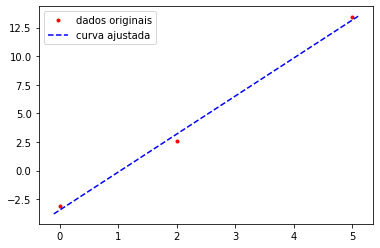

In [19]:
# regressão linear
import numpy as np
import matplotlib.pyplot as plt

xs=np.array([0,2,5])
ys=np.array([-3.1,2.6,13.4])
param=np.polyfit(xs,ys,1) # ajuda a curva
print('parâmetros: ',param) #mostra os parâmetros
a, b = param
print('reta: y = %.5f * x + %.5f' % (a, b)) 
#gráfico
x_fit=np.linspace(-0.1,5.1,1000)
y_fit=np.polyval(param,x_fit)
plt.plot(xs,ys,'r.',label='dados originais')
plt.plot(x_fit,y_fit,'b--',label='curva ajustada')
plt.legend()

In [22]:
#gera um arquivo de dados, caso não tenhamos um para carregar
import numpy as np
val_x=np.arange(-5,5,0.2) #cria um vetor xs=[-5,-4.8,...,+4.8]
val_y=3*val_x**3+4.5*val_x**2-60*val_x+2 #calcula ys para cada valor de xs
ruido=20*np.random.normal(0,1,len(val_x)) #cria um ruido do tamanho de xs
val_y=val_y + ruido #soma o ruido com a função
np.savetxt("meus_dados.csv", [val_x,val_y], delimiter=",")

parâmetros:  [  3.07618858   4.48832161 -60.79953719   5.37627393]
R^2= 0.940


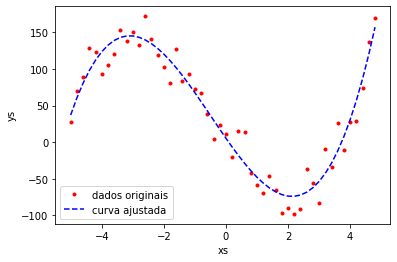

In [23]:
# regressão polinomial (3ª ordem)
import numpy as np
import matplotlib.pyplot as plt
#carrega os dados do arquivo "meus_dados.csv"
xs,ys=np.genfromtxt("meus_dados.csv", delimiter=",")
param=np.polyfit(xs,ys,3) #ajusta a curva para grau 3
print('parâmetros: ',param) #mostra os parâmetros encontrados
#gráfico
x_fit=xs #usa os mesmos valores de xs para calcular a função ajustada
y_fit=np.polyval(param,x_fit) #calcula os valores de y da função ajustada
plt.figure()
plt.plot(xs,ys,'r.',label='dados originais')
plt.plot(x_fit,y_fit,'b--',label='curva ajustada')
plt.xlabel('xs') #coloca titulo no eixo x
plt.ylabel('ys') #coloca titulo no eixo y
plt.legend()
print('R^2= {:.3f}'.format(np.corrcoef(ys, y_fit)[0,1]**2))

In [17]:
#gera um arquivo de dados exponenciais, caso não tenhamos um para carregar
import numpy as np
val_x=np.arange(-3,3,0.1)#cria um vetor xs=[-3,-2.9,...,+2.9]
val_y= 1*np.exp(-0.8*val_x)-5 #calcula ys para cada valor de xs
ruido=0.3*np.random.normal(0,1,len(val_x)) #cria um ruido do tamanho de xs
val_y=val_y+ruido #soma o ruido com a função
np.savetxt("meus_dados2.csv", [val_x,val_y], delimiter=",")

parâmetros:  [ 1.07891842  0.78362918 -5.04914199]


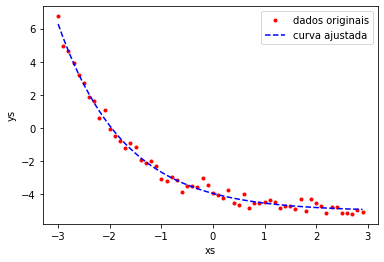

R^2= 0.991


In [25]:
# regressão sobre uma função qualquer
# https://machinelearningmastery.com/curve-fitting-with-python/

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#carrega os dados do arquivo "meus_dados2.csv"
xs,ys=np.genfromtxt("meus_dados2.csv", delimiter=",")
# define a função que será ajustada usando uma subrotina
def f_obj(x, a, b, c):
  return a * np.exp(-b*x) + c
param, _ = curve_fit(f_obj, xs, ys) # ajuste da curva
a, b, c = param # obtem os parametros encontrados no fit
print('parâmetros: ',param) #mostra os parâmetros encontrados
#gráfico
x_fit = xs
y_fit = f_obj(x_fit, a, b, c) #cal. valores de y da função ajustada
plt.plot(xs, ys,'r.',label='dados originais')
plt.plot(x_fit,y_fit,'b--',label='curva ajustada')
plt.legend()
plt.xlabel('xs') #coloca titulo no eixo x
plt.ylabel('ys') #coloca titulo no eixo y
plt.show()
print('R^2= {:.3f}'.format(np.corrcoef(ys, y_fit)[0,1]**2))

parâmetros:  [ 1.07891842  0.78362918 -5.04914199]
R^2= 0.991


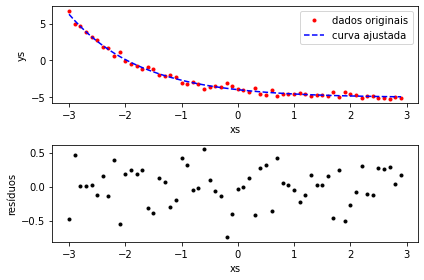

In [18]:
# regressão sobre uma função qualquer com resíduo
# https://machinelearningmastery.com/curve-fitting-with-python/

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#carrega os dados do arquivo "meus_dados2.csv"
xs,ys=np.genfromtxt("meus_dados2.csv", delimiter=",")
# define a função que será ajustada usando uma subrotina
def f_obj(x, a, b, c):
  return a * np.exp(-b*x) + c
param, _ = curve_fit(f_obj, xs, ys) # ajuste da curva
a, b, c = param # obtem os parametros encontrados no fit
print('parâmetros: ',param) #mostra os parâmetros encontrados
#gráfico
x_fit = xs
y_fit = f_obj(x_fit, a, b, c) #cal. valores de y da função ajustada
residuos=y_fit-ys
plt.subplot(2,1,1)
plt.plot(xs, ys,'r.',label='dados originais')
plt.plot(x_fit,y_fit,'b--',label='curva ajustada')
plt.legend()
plt.xlabel('xs') #coloca titulo no eixo x
plt.ylabel('ys') #coloca titulo no eixo y
plt.subplot(2,1,2)
plt.plot(xs, residuos,'k.')
plt.xlabel('xs') #coloca titulo no eixo x
plt.ylabel('resíduos') #coloca titulo no eixo y
plt.tight_layout()
print('R^2= {:.3f}'.format(np.corrcoef(ys,y_fit)[0,1]**2))